In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from scipy.stats import norm, kde
import math

In [2]:
#reading in data into dataframe from local csv
df = pd.read_csv("spotify_songs.csv")

In [3]:
#removing all irrelevant columns
df = df.drop(columns = ["track_id","track_album_id","playlist_id"])

In [4]:
#sort by track popularity
df = df.sort_values('track_popularity', ascending = False)

In [5]:
#removing duplicate data by track name
df = df.drop_duplicates(subset = ['track_name'], keep='first')

In [6]:
df

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
20091,Dance Monkey,Tones and I,100,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,Global Top 50 | 2020 Hits,latin,latin hip hop,0.824,0.588,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,209438
30202,ROXANNE,Arizona Zervas,99,ROXANNE,2019-10-10,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,edm,pop edm,0.621,0.601,6,-5.616,0,0.1480,0.05220,0.000000,0.4600,0.457,116.735,163636
30209,Circles,Post Malone,98,Hollywood's Bleeding,2019-09-06,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,edm,pop edm,0.695,0.762,0,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.553,120.042,215280
19715,Blinding Lights,The Weeknd,98,Blinding Lights,2019-11-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,latin,latin hip hop,0.513,0.796,1,-4.075,1,0.0629,0.00147,0.000209,0.0938,0.345,171.017,201573
20252,Tusa,KAROL G,98,Tusa,2019-11-07,Urbano: Latino Vibes,latin,latin hip hop,0.803,0.715,2,-3.280,1,0.2980,0.29500,0.000134,0.0574,0.574,101.085,200960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,Blind Spot,Darkly,0,Blind Spot,2015-10-23,Indie Poptimism!,pop,indie poptimism,0.570,0.581,11,-10.617,1,0.0462,0.02740,0.000029,0.1150,0.365,119.930,268000
4993,Runaway - Maths Time Joy Remix,Electric Youth,0,Runaway (Maths Time Joy Remix),2014,Indie Poptimism!,pop,indie poptimism,0.629,0.486,6,-12.178,1,0.0426,0.09620,0.103000,0.0842,0.274,150.005,260199
4992,Cool Blue,The Japanese House,0,Cool Blue,2015-09-15,Indie Poptimism!,pop,indie poptimism,0.383,0.569,0,-10.407,1,0.0550,0.88300,0.106000,0.1240,0.524,180.036,231364
4983,Halfway To Heaven,Panama Wedding,0,Into Focus EP,2015-11-06,Indie Poptimism!,pop,indie poptimism,0.637,0.678,5,-7.051,1,0.0410,0.16000,0.013600,0.1710,0.759,164.946,207227


In [7]:
#subset of df for top 100 songs based on 'track_popularity'
top100 = df.iloc[:100]
top100

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
20091,Dance Monkey,Tones and I,100,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,Global Top 50 | 2020 Hits,latin,latin hip hop,0.824,0.588,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,209438
30202,ROXANNE,Arizona Zervas,99,ROXANNE,2019-10-10,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,edm,pop edm,0.621,0.601,6,-5.616,0,0.1480,0.05220,0.000000,0.4600,0.457,116.735,163636
30209,Circles,Post Malone,98,Hollywood's Bleeding,2019-09-06,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,edm,pop edm,0.695,0.762,0,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.553,120.042,215280
19715,Blinding Lights,The Weeknd,98,Blinding Lights,2019-11-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,latin,latin hip hop,0.513,0.796,1,-4.075,1,0.0629,0.00147,0.000209,0.0938,0.345,171.017,201573
20252,Tusa,KAROL G,98,Tusa,2019-11-07,Urbano: Latino Vibes,latin,latin hip hop,0.803,0.715,2,-3.280,1,0.2980,0.29500,0.000134,0.0574,0.574,101.085,200960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6110,Suge,DaBaby,87,Baby On Baby,2019-03-01,Hip Hop Controller,rap,hip hop,0.876,0.662,2,-6.482,0,0.4260,0.06080,0.000000,0.1270,0.844,75.445,163320
18382,"thank u, next",Ariana Grande,87,"thank u, next",2019-02-08,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,latin,latin pop,0.717,0.653,1,-5.634,1,0.0658,0.22900,0.000000,0.1010,0.412,106.966,207320
23770,Liar,Camila Cabello,87,Liar,2019-09-04,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,r&b,hip pop,0.740,0.498,11,-6.684,0,0.0456,0.01690,0.002820,0.3190,0.652,98.016,207039
20265,Bellaquita - Remix,Dalex,87,Bellaquita (Remix),2019-11-22,Urbano: Latino Vibes,latin,latin hip hop,0.795,0.715,1,-3.582,1,0.0838,0.14100,0.000002,0.1790,0.758,165.941,304733


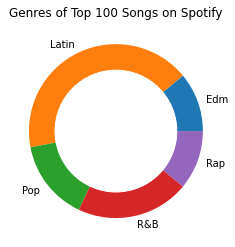

In [8]:
#preparing labels for pie chart
category_names = top100['playlist_genre']
category_names = category_names.str.title()
categories = category_names.unique()
categories.sort()

#creating values for pie chart
category_values = top100.pivot_table(columns=['playlist_genre'], aggfunc='size')

#creation and plot of pie chart
plt.pie(category_values, labels=categories)
circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)

plt.title("Genres of Top 100 Songs on Spotify")
plt.show()

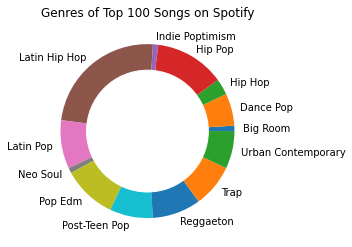

In [9]:
#same idea but with more specific genre descriptions

#preparing labels for pie chart
category_names = top100['playlist_subgenre']
category_names = category_names.str.title()
categories = category_names.unique()
categories.sort()

#creating values for pie chart
category_values = top100.pivot_table(columns=['playlist_subgenre'], aggfunc='size')

#creation and plot of pie chart
plt.pie(category_values, labels=categories)
circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)

plt.title("Genres of Top 100 Songs on Spotify")
plt.show()

In [10]:
#creating seperate dataframe for timeseries analysis for trends over time
timeSeriesDf = df

In [11]:
#formatting date data to use in timeseries analysis
timeSeriesDf['track_album_release_date'] = pd.to_datetime(timeSeriesDf['track_album_release_date'])
timeSeriesDf

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
20091,Dance Monkey,Tones and I,100,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,Global Top 50 | 2020 Hits,latin,latin hip hop,0.824,0.588,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,209438
30202,ROXANNE,Arizona Zervas,99,ROXANNE,2019-10-10,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,edm,pop edm,0.621,0.601,6,-5.616,0,0.1480,0.05220,0.000000,0.4600,0.457,116.735,163636
30209,Circles,Post Malone,98,Hollywood's Bleeding,2019-09-06,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,edm,pop edm,0.695,0.762,0,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.553,120.042,215280
19715,Blinding Lights,The Weeknd,98,Blinding Lights,2019-11-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,latin,latin hip hop,0.513,0.796,1,-4.075,1,0.0629,0.00147,0.000209,0.0938,0.345,171.017,201573
20252,Tusa,KAROL G,98,Tusa,2019-11-07,Urbano: Latino Vibes,latin,latin hip hop,0.803,0.715,2,-3.280,1,0.2980,0.29500,0.000134,0.0574,0.574,101.085,200960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,Blind Spot,Darkly,0,Blind Spot,2015-10-23,Indie Poptimism!,pop,indie poptimism,0.570,0.581,11,-10.617,1,0.0462,0.02740,0.000029,0.1150,0.365,119.930,268000
4993,Runaway - Maths Time Joy Remix,Electric Youth,0,Runaway (Maths Time Joy Remix),2014-01-01,Indie Poptimism!,pop,indie poptimism,0.629,0.486,6,-12.178,1,0.0426,0.09620,0.103000,0.0842,0.274,150.005,260199
4992,Cool Blue,The Japanese House,0,Cool Blue,2015-09-15,Indie Poptimism!,pop,indie poptimism,0.383,0.569,0,-10.407,1,0.0550,0.88300,0.106000,0.1240,0.524,180.036,231364
4983,Halfway To Heaven,Panama Wedding,0,Into Focus EP,2015-11-06,Indie Poptimism!,pop,indie poptimism,0.637,0.678,5,-7.051,1,0.0410,0.16000,0.013600,0.1710,0.759,164.946,207227


In [12]:
#creating a 'release year' column to analyze trends based on the release year of music

timeSeriesDf['release_year'] = timeSeriesDf['track_album_release_date'].apply(lambda x: "%d" % (x.year))

In [13]:
#grouping data by year and counting the amount of songs in each genre per year

groupByGenreByYear = timeSeriesDf.groupby(['release_year', 'playlist_genre']).size().to_frame('count').reset_index()
groupByGenreByYear['release_year'] = pd.to_numeric(groupByGenreByYear['release_year'])

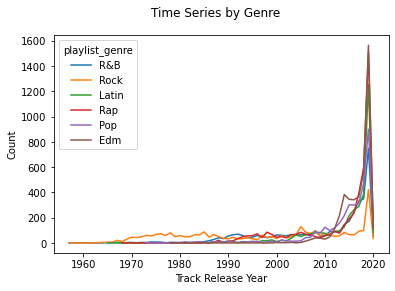

In [14]:
#plotting data in a line plot to show trends

fig, ax = plt.subplots()

#capitalizing genres for cleaner legend
groupByGenreByYear['playlist_genre']=groupByGenreByYear['playlist_genre'].str.title()

#importing data into lineplot
sns.lineplot(data = groupByGenreByYear, x = 'release_year', y = 'count', hue = 'playlist_genre')

#adding labels for better descriptions
plt.xlabel('Track Release Year')
plt.ylabel('Count')
fig.suptitle('Time Series by Genre')

plt.show()

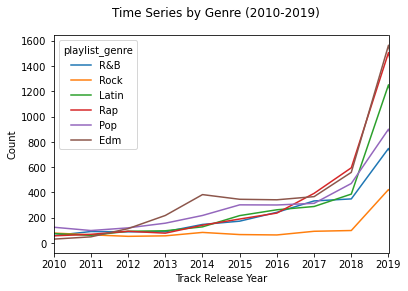

In [15]:
#plotting data in a line plot to show trends

fig, ax = plt.subplots()

#capitalizing genres for cleaner legend
groupByGenreByYear['playlist_genre']=groupByGenreByYear['playlist_genre'].str.title()

#importing data into lineplot
sns.lineplot(data = groupByGenreByYear, x = 'release_year', y = 'count', hue = 'playlist_genre')
 
# change the limits of X-axis (which years)
ax.set_xlim(2010, 2019) 

#adding labels for better descriptions
plt.xlabel('Track Release Year')
plt.ylabel('Count')
fig.suptitle('Time Series by Genre (2010-2019)')

plt.show()

In [16]:
#new dataframe where we analyze tracks with track_popularity over 75 
#will help us recognize trends of the songs that are most popular

popularSongs = df.loc[df['track_popularity']>=75]
popularSongs

,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_genre,playlist_subgenre,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,release_year
20091,Dance Monkey,Tones and I,100,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,Global Top 50 | 2020 Hits,latin,latin hip hop,0.824,0.588,...,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,209438,2019
30202,ROXANNE,Arizona Zervas,99,ROXANNE,2019-10-10,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,edm,pop edm,0.621,0.601,...,-5.616,0,0.1480,0.05220,0.000000,0.4600,0.457,116.735,163636,2019
30209,Circles,Post Malone,98,Hollywood's Bleeding,2019-09-06,Charts 2020 🔥Top 2020🔥Hits 2020🔥Summer 2020🔥Po...,edm,pop edm,0.695,0.762,...,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.553,120.042,215280,2019
19715,Blinding Lights,The Weeknd,98,Blinding Lights,2019-11-29,2020 Hits & 2019 Hits – Top Global Tracks 🔥🔥🔥,latin,latin hip hop,0.513,0.796,...,-4.075,1,0.0629,0.00147,0.000209,0.0938,0.345,171.017,201573,2019
20252,Tusa,KAROL G,98,Tusa,2019-11-07,Urbano: Latino Vibes,latin,latin hip hop,0.803,0.715,...,-3.280,1,0.2980,0.29500,0.000134,0.0574,0.574,101.085,200960,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13698,You Can Call Me Al,Paul Simon,75,Graceland (25th Anniversary Deluxe Edition),1986-08-12,The Sound of Permanent Wave,rock,permanent wave,0.776,0.763,...,-8.124,1,0.0535,0.18200,0.006500,0.0770,0.820,128.433,280000,1986
17507,Ya Me Enteré,Reik,75,Des/Amor,2016-06-17,Latin Pop Classics,latin,latin pop,0.619,0.452,...,-5.449,1,0.0280,0.50200,0.000000,0.1220,0.174,131.981,204173,2016
12030,Love Song,Sara Bareilles,75,Little Voice,2007-07-03,L' ALBUM ROCK,rock,album rock,0.583,0.786,...,-3.142,0,0.0301,0.02080,0.000000,0.1880,0.573,123.052,258827,2007
10813,Betrayed,Lil Xan,75,TOTAL XANARCHY,2018-04-06,Sad Trap,rap,trap,0.821,0.434,...,-9.194,0,0.1180,0.43400,0.000000,0.1280,0.241,120.012,187173,2018


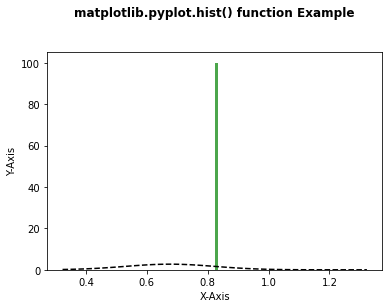

In [25]:

mu = popularSongs['danceability'].mean()
sigma = popularSongs['danceability'].std()

  
n, bins, patches = plt.hist(x, num_bins, 
                            density = 1, 
                            color ='green',
                            alpha = 0.7)
  
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
 
plt.plot(bins, y, '--', color ='black')
 
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
 
plt.title('matplotlib.pyplot.hist() function Example\n\n',
          fontweight = "bold")
 
plt.show()

With the provided data dictionary for a dataset of 30,000 Spotify songs, you can perform various types of analysis to gain insights into the music and its characteristics. Here are some analyses you can consider:

Descriptive Statistics:

Calculate summary statistics for numerical variables such as track_popularity, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and duration_ms.
Genre and Playlist Analysis:

Explore the distribution of songs across different playlist genres and subgenres.
Determine the most popular genres and subgenres based on track_popularity.
Analyze the distribution of songs within playlists and how it varies by genre.
Popularity Analysis:

Investigate the distribution of track_popularity and determine which factors (e.g., danceability, energy, valence) are correlated with higher popularity.


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Time Series Analysis:
Analyze how the popularity of songs has changed over time by examining track_album_release_date.
Explore trends in the release of songs and albums over different years.
(how long is the average song per year, what genres are popular now vs then, etc)


Key and Mode Analysis:

Determine the most common musical key and mode used in the songs.
Investigate whether there are trends related to key and mode with regard to track_popularity.
Speechiness and Instrumentalness:

Analyze the presence of speech-like content in songs (speechiness) and the likelihood of songs being instrumental (instrumentalness).
Explore whether there's a relationship between these attributes and genre or track popularity.
Acousticness and Liveness:

Examine the degree of acousticness and liveness in songs and identify any trends.
Determine if acousticness and liveness influence track_popularity.
Valence Analysis:

Analyze how the valence of songs relates to their popularity and explore trends in the emotional positivity conveyed by tracks.
Tempo and Duration Analysis:

Investigate the distribution of tempo (beats per minute) and its relationship with track_popularity.
Analyze the duration of songs and its impact on popularity.
Artist Analysis:

Identify the most popular artists based on track_popularity.
Analyze the distribution of songs and their characteristics by different artists.
Visualization:

Create visualizations such as histograms, scatter plots, bar charts, and line graphs to help visualize the relationships and patterns within the dataset.
Machine Learning and Predictive Models:

Build predictive models to predict track_popularity based on various attributes.
Evaluate the model's performance and identify the most influential features.
Clustering Analysis:

Cluster songs based on their attributes to identify patterns and group similar songs together.
Remember that the specific analyses you choose will depend on your research goals and the questions you want to answer with the dataset. Data preprocessing, visualization, and statistical techniques will be essential in conducting these analyses effectively.